In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
df = pd.read_csv('emails.csv.zip', \
                 sep=',', encoding='latin-1')

In [12]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df = df.drop(["the", "to", "ect"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"text"})
df.head()

,Email No.,and,for,of,a,you,hou,in,on,is,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,6,6,2,102,1,27,18,21,13,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,0,8,0,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,1,51,2,10,1,5,9,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,1,5,2,57,0,9,3,12,2,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df.shape

(5172, 3002)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [16]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [17]:
df.drop('Email No.', axis=1, inplace=True)

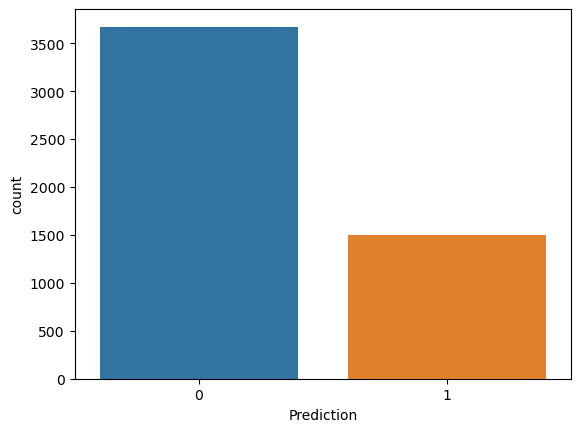

In [18]:
sns.countplot(data=df, x='Prediction')
plt.show()

In [19]:
x = df.drop('Prediction', axis=1)
y = df['Prediction']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/jakobanhorn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
def eval(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for Logistic Regression: \n')
    print(classification_report(y_test, y_pred))
    t1.plot()

Classification Report for Logistic Regression: 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       739
           1       0.94      0.95      0.94       296

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



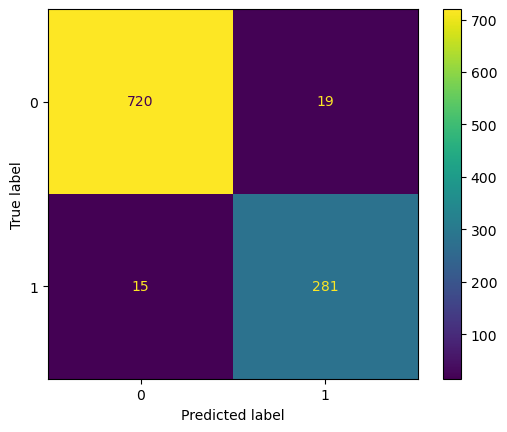

In [24]:
eval('Model Results', y_test, y_pred)